In [1]:
from scipy.fft import fft2, ifft2, fftfreq, fftshift
import numpy as np
import matplotlib.pyplot as plt

In [2]:
r0 = 100
N = 1000
x = np.linspace(-200, 200, N)
Δx = x[1]-x[0]
y = np.linspace(-200, 200, N)
Δy = y[1]-y[0]
X, Y = np.meshgrid(x, y)
circ = X**2+Y**2 < r0**2        # Función circ

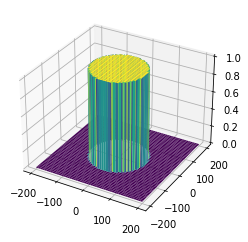

In [3]:
plt.axes(projection='3d').plot_surface(X,Y,circ,cmap='viridis')
plt.show()

In [4]:
fftU = fftshift(fft2(1-circ))*Δx*Δy   # Transformada de Fourier del campo de entrada
fx = fftshift(fftfreq(N, Δx))
Δfx = fx[1]-fx[0]
fy = fftshift(fftfreq(N, Δy))
Δfy = fy[1]-fy[0]
Fx, Fy = np.meshgrid(fx, fy)

In [5]:
z = 5
α = 2*np.pi*np.sqrt(abs(1-(Fx**2+Fy**2)))
H = np.exp(1j*α*z)                          # Función de transferencia
U = (ifft2(fftU*H))*Δfx*Δfy                 # Campo a una distancia z

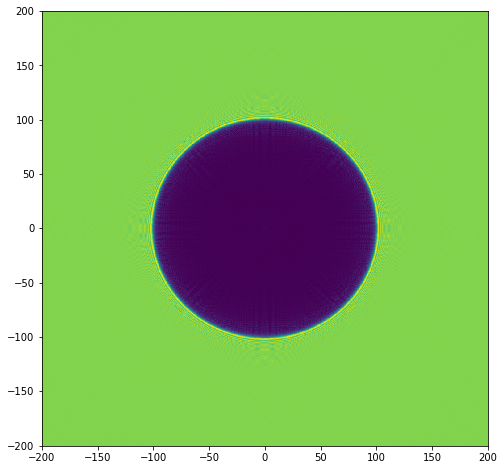

In [6]:
plt.figure(figsize=(8, 8))
plt.pcolormesh(X,Y,abs(U),shading='auto')
plt.show()

In [7]:
z = 700
H = np.exp(1j*α*z)                          # Función de transferencia
U = (ifft2(fftU*H))*Δfx*Δfy                 # Campo a una distancia z

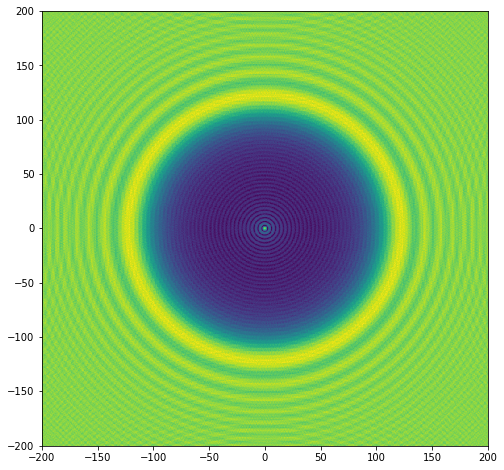

In [8]:
plt.figure(figsize=(8, 8))
plt.pcolormesh(X,Y,abs(U),shading='auto')
plt.show()